<a href="https://colab.research.google.com/github/ann-macharia/IP-CORE-WEEK-4/blob/master/CORE_INDEPENDENT_PROJECT_4%2C_ANN_MACHARIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DEFINING THE QUESTION

# DEFINING THE QUESTION


a) **Specifying data analytic question**

Is it true to say that The average blue car activity per station in paris is greater in the morning hours than in the afternoon hours?

b)  **Defining the Metric for Success**

Hypothesis testing will be carried out. The significance level will be compared to the P-Value,and from this we will be able to make our conclusion.
P-Value < Significance level, null hypothesis willbe rejected

c)  **Understanding the context**

Usage of electric cars has seen growth with the advancement of technology. Unlike the fuel cars,electric cars are more environmentally friendly and thus sustainable. An increase in electric car usage will mean a well kept environment.

Autolib is an electric car sharing company. the company has 3 main types of electric cars: blue cars, utilib counter and the utilib 4 counter. these cars operate in the city of france.

There has been several discussions on when there is highest activity of the blue car, whether it is in the morning hours or the afternoon hours. The company has tasked me to do an investigation toclearly know at what times usage is greater. This will mostly help in planning the marketing strategies and segmentation

d)  **Recording the Experimental Design**

The main objective of the ressearch is to determine whether the average blue car activity per station in paris is greater in the morning hours than in the afternoon hours. 
I will use a data set from the Autolib company to do my analysis. Data will be cleaned and quality assurance done.
i will then proceed to analysis(Univariate, Bivariate and Multivariate) so as to get a deeper understanding of the data.
A sample from the data will be used to carry out hypothesis testing and thus answer the business question, make conclusions and recommendations.

d) **Data relevance**

The autolib data set is from the previous business year 2018. This was in the latest annual report prepare by the Autolib company. It will be used to answer the business as it is well detailed and contains all important information including: car type, city, postal adress time, electric car stations details e.t.c


# READING THE DATA

In [0]:
#loading libraries
import pandas as pd
from datetime import datetime
    

In [0]:
#loading the data set
A='/content/Autolib_dataset.csv'
df=pd.read_csv(A)
df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [0]:
#ACESSSING INFORMATION ABOUT OUR DATASET
print(df.shape)
df.info()

(5000, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
Address                5000 non-null object
Cars                   5000 non-null int64
Bluecar counter        5000 non-null int64
Utilib counter         5000 non-null int64
Utilib 1.4 counter     5000 non-null int64
Charge Slots           5000 non-null int64
Charging Status        5000 non-null object
City                   5000 non-null object
Displayed comment      111 non-null object
ID                     5000 non-null object
Kind                   5000 non-null object
Geo point              5000 non-null object
Postal code            5000 non-null int64
Public name            5000 non-null object
Rental status          5000 non-null object
Scheduled at           47 non-null object
Slots                  5000 non-null int64
Station type           5000 non-null object
Status                 5000 non-null object
Subscription status    5000 non-null object
year        

In [0]:
#removing irrelevant columns
df1=df.drop(['Displayed comment','Scheduled at'], axis=1)

In [0]:
#REMOVING OUTLIERS
Q3=df1.quantile(0.75)
Q1=df1.quantile(0.25)
IQR = Q3 - Q1
print(IQR)
print((df1  < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR)))
dff= df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
dff.shape


Cars                      4.0
Bluecar counter           4.0
Utilib counter            0.0
Utilib 1.4 counter        0.0
Charge Slots              0.0
Postal code           17308.0
Slots                     3.0
year                      0.0
month                     0.0
day                       4.0
hour                     12.0
minute                   30.0
dtype: float64
      Address  Bluecar counter   Cars  ...  minute  month   year
0       False            False  False  ...   False  False  False
1       False            False  False  ...   False  False  False
2       False            False  False  ...   False  False  False
3       False            False  False  ...   False  False  False
4       False            False  False  ...   False  False  False
...       ...              ...    ...  ...     ...    ...    ...
4995    False            False  False  ...   False  False  False
4996    False            False  False  ...   False  False  False
4997    False            False  False  .

(3317, 23)

In [0]:
#checking for missing values
dff.isnull().sum()
# no missing values.

Address                0
Cars                   0
Bluecar counter        0
Utilib counter         0
Utilib 1.4 counter     0
Charge Slots           0
Charging Status        0
City                   0
ID                     0
Kind                   0
Geo point              0
Postal code            0
Public name            0
Rental status          0
Slots                  0
Station type           0
Status                 0
Subscription status    0
year                   0
month                  0
day                    0
hour                   0
minute                 0
dtype: int64

In [0]:
#MERGING DATES AND TIME
dff['Date'] = dff["year"].map(str) +'-'+ dff["month"].map(str) +'-'+ dff["day"].map(str)
dff.head()
dff['Time']=dff["hour"].map(str) +'-'+ dff["minute"].map(str)
dff.head()
dff['Date-Time']= dff["Date"].map(str) +'-'+ dff["Time"].map(str)
dff.head()
dff.drop(['year','month','hour','day','minute','Date','Time'],axis=1,inplace=True)
dff.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,Date-Time
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018-4-8-11-43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018-4-6-7-24
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018-4-8-17-23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,4,station,ok,nonexistent,2018-4-6-7-2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,0,station,closed,nonexistent,2018-4-8-18-20


In [0]:
#converting date_time from string to datetime.

dff['Date-Time']= pd.to_datetime(dff['Date-Time'],format='%Y-%m-%d-%H-%M' )


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
dff['Date-Time']

0      2018-04-08 11:43:00
1      2018-04-06 07:24:00
4      2018-04-08 17:23:00
5      2018-04-06 07:02:00
6      2018-04-08 18:20:00
               ...        
4993   2018-04-02 04:43:00
4994   2018-04-01 20:49:00
4995   2018-04-06 11:26:00
4998   2018-04-04 17:27:00
4999   2018-04-08 10:02:00
Name: Date-Time, Length: 3317, dtype: datetime64[ns]

# UNIVARIATE ANALYSIS

In [0]:
#importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 


In [0]:
#analysing adresses column.
#dff['Address'].value_counts().plot(kind='bar')
dff['Address'].value_counts()

31 boulevard de Grenelle       11
32 rue Robert Marchand         10
20 Rue Villiot                  9
58 avenue de la RÃ©publique     9
125 rue Diderot                 9
                               ..
16 avenue de la rÃ©publique     1
2 bis rue Valette               1
17 voie Sonia Delaunay          1
8 Quai du MarchÃ© Neuf          1
35 quai Alphonse Le Gallo       1
Name: Address, Length: 1004, dtype: int64

The 31 boulevard de Grenelle appears most times.From the data we can say it is the most active station

In [0]:
# city counts.
dff['City'].value_counts()


Paris                    1550
Nanterre                  100
Issy-les-Moulineaux        82
CrÃ©teil                   78
Rueil-Malmaison            73
                         ... 
Meudon-la-ForÃªt            3
Le PrÃ©-Saint-Gervais       3
Aubervilliers               3
Saint-Maur                  2
Clichy la garenne           2
Name: City, Length: 87, dtype: int64

It is clear that most of the electric cars are operating on paris.


Text(0, 0.5, 'count')

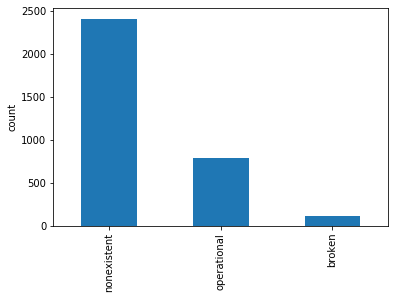

In [0]:
dff['Charging Status'].value_counts().plot(kind='bar')
plt.ylabel('count')

Most stations dont have charging slots. This could probably be attributed to the fact that EC's are just entering into market and construction of fully operational stations is still ongoing.

Text(0.5, 0, 'Count')

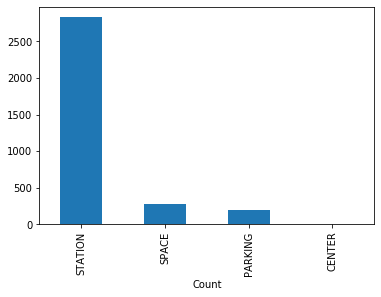

In [0]:
dff['Kind'].value_counts().plot(kind='bar')
plt.xlabel('Count')

Some car centres are stations others are parking areas, spaces and centres. full stations are the most. here an EC can get all the services contrary to the rest.

Text(0, 0.5, 'count')

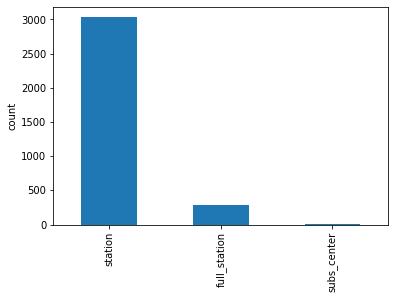

In [0]:
dff['Station type'].value_counts().plot(kind='bar')
plt.ylabel('count')

Text(0, 0.5, 'count')

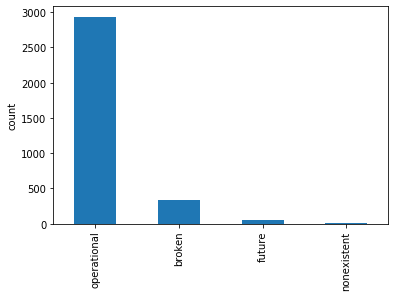

In [0]:
dff['Rental status'].value_counts().plot(kind='bar')
plt.ylabel('count')

Renting of ECs can be done in most stations

Text(0, 0.5, 'count')

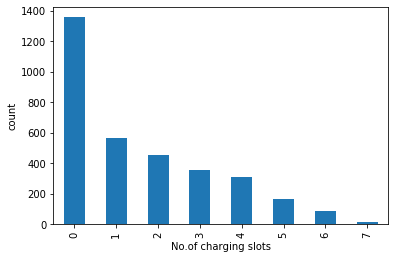

In [0]:
dff['Slots'].value_counts().plot(kind='bar')
plt.xlabel('No.of charging slots')
plt.ylabel('count')

Mosts stations have no charging slots. 

Text(0, 0.5, 'count')

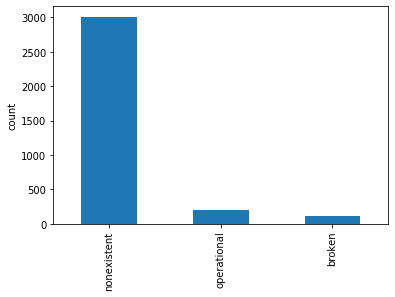

In [0]:
dff['Subscription status'].value_counts().plot(kind='bar')
plt.ylabel('count')

most station's subscription is non-existence followed by operationaal and then broken

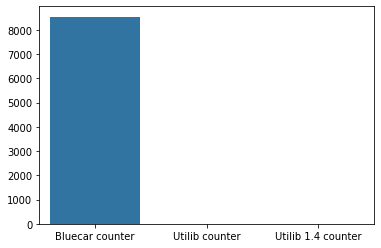

In [0]:
a=['Bluecar counter',	'Utilib counter',	'Utilib 1.4 counter']
y=[i for i in dff[a].sum()]
y
sns.barplot(x=a, y=y)
#plt.bar(a,y, kind='bar',color='green')

# BIVARIATE ANALYSIS

There is only ativity for the blue car. From the data we can conclude that the utilib counter and the utilib  1.4 counter are not oprational.

Text(0, 0.5, 'total no.of slots')

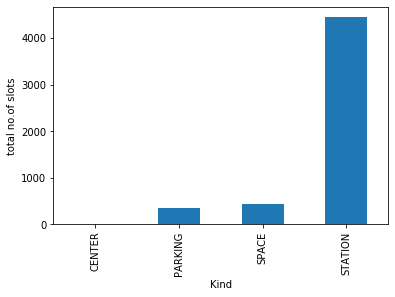

In [0]:
dff.groupby('Kind')['Slots'].sum().plot(kind='bar')
plt.ylabel('total no.of slots')


The stations have the highest number of charging slots.

Text(0, 0.5, 'Count')

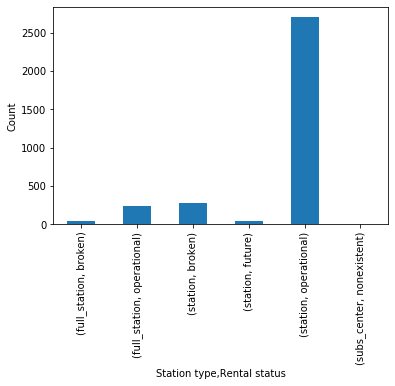

In [0]:
dff.groupby(['Station type', 'Rental status'])['Rental status'].count().plot(kind='bar')
plt.ylabel('Count')

most of the Electric car centres are of type 'station' and they are operational

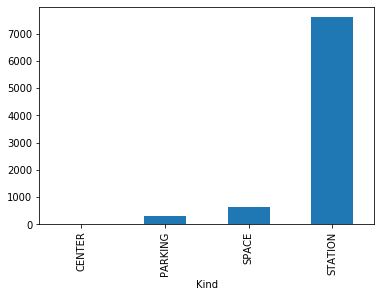

In [0]:
dff.groupby('Kind')['Bluecar counter'].sum().plot(kind='bar')

Most of the Electric vehicle operations take place in the stations.


# MULTIVARIATE ANALYSIS

in multivariate analysis, model will try to predict station type given (slots, rental status, subscription status and status.


In [0]:
p=['Slots', 'Rental status', 'Subscription status', 'Status','Station type']
t=[i for i in p]
dfm=pd.DataFrame(dff[t])
dfm.head()



,Slots,Rental status,Subscription status,Status,Station type
0,2,operational,nonexistent,ok,station
1,0,operational,nonexistent,ok,station
4,3,operational,nonexistent,ok,station
5,4,operational,nonexistent,ok,station
6,0,broken,nonexistent,closed,station


In [0]:
# label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
dfm['Rental status']=label_encoder.fit_transform(dfm['Rental status'])
dfm['Subscription status']=label_encoder.fit_transform(dfm['Rental status'])
dfm['Status']=label_encoder.fit_transform(dfm['Rental status'])
dfm.head()


,Slots,Rental status,Subscription status,Status,Station type
0,2,3,3,3,station
1,0,3,3,3,station
4,3,3,3,3,station
5,4,3,3,3,station
6,0,0,0,0,station


In [0]:
#Separating features and labels
X = dfm.drop('Station type', 1)
y = dfm['Station type']


In [0]:
#Split the data into a training set and testing set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
#Normalisation
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#Appying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([7.85281176e-01, 2.14718824e-01, 5.89991455e-31, 1.27754625e-32])

In [0]:
#Using two principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
#Training
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
#predicting
y_pred = classifier.predict(X_test)


In [0]:
#Performance evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


[[  0  63   0]
 [  0 600   0]
 [  0   1   0]]
Accuracy 0.9036144578313253


# HYPOTHESIS TESTING

 ## **Hypothesis Statement Formulation**

**Null hypothesis.**

**Ho**: The average blue car activity per station in paris is no greater in the morning hours(6-12) than in the afternoon hours(12-18).
Ho: U1=u2

**Alternative hypothesis.**

**H1**: The average blue car activity per station in paris is greater in the morning hours(6-12) than in the afternoon hours(12-18). Ho: U1>u2

**selecting data to work with**

In [0]:
#OBTAINING DATA WHERE CITY IS PARIS AND CAR TYPE IS 'BLUECAR'
dfp=dff[(dff['City']=='Paris') & (dff['Bluecar counter']!=0)]
dfp.head()


,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,Date-Time
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018-04-06 07:24:00
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018-04-08 17:23:00
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,4,station,ok,nonexistent,2018-04-02 22:58:00
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,0,station,ok,nonexistent,2018-04-04 15:02:00
17,182 Boulevard Voltaire,6,6,0,0,0,operational,Paris,paris-voltaire-182,STATION,"48.8548, 2.385047",75011,Paris/Voltaire/182,operational,0,station,ok,nonexistent,2018-04-09 12:14:00


MORNING HOURS DATA

In [0]:
#Here we obtain a subset of data where hours are between 6 and 12
X=dfp[(dfp['Date-Time'].dt.hour>5) & (dfp['Date-Time'].dt.hour<13)]
X.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,Date-Time
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018-04-06 07:24:00
17,182 Boulevard Voltaire,6,6,0,0,0,operational,Paris,paris-voltaire-182,STATION,"48.8548, 2.385047",75011,Paris/Voltaire/182,operational,0,station,ok,nonexistent,2018-04-09 12:14:00
20,2 Place de Catalogne,3,3,0,0,0,operational,Paris,paris-catalogne-2,SPACE,"48.8367951, 2.3186569",75014,Paris/Catalogne/2,operational,0,full_station,ok,operational,2018-04-05 06:16:00
33,6 rue de Londres,3,3,0,0,0,nonexistent,Paris,paris-londres-6,STATION,"48.8768536, 2.3302084",75009,Paris/Londres/6,operational,0,station,ok,nonexistent,2018-04-09 10:28:00
58,229 Rue Raymond Losserand,5,5,0,0,0,operational,Paris,paris-raymondlosserand-229,STATION,"48.828, 2.306022",75014,Paris/Raymond Losserand/229,operational,1,station,ok,nonexistent,2018-04-08 08:22:00


In [0]:
# We sort values by station ID and date time, so it is clear how cars arrived 
# and left a particlar station
X1=X.sort_values('Date-Time').groupby(['ID','Date-Time']).sum()
X1.head()

Cars  ...  Slots
ID                   Date-Time                  ...       
paris-25aout1944-8   2018-04-02 07:37:00     4  ...      0
                     2018-04-02 12:49:00     2  ...      1
paris-adolphemax-6   2018-04-02 11:01:00     4  ...      0
paris-adolphemille-8 2018-04-03 12:25:00     2  ...      1
paris-alesia-33      2018-04-07 07:43:00     5  ...      1

[5 rows x 7 columns]

In [0]:
# A new column called diff is created.It helps us identify when a cars left and arrived
# at a station. positive numbers show a car left a station. Negative numbers
# show a car arrived at a station. Null values show no activity at a station
# The diff values are then converted to absoluted values for easier computation.
X1['diff'] = X1.groupby(['ID'])['Bluecar counter'].apply(lambda x:  x.shift(1) - x)
X1['diff'] = X1['diff'].abs()
X1['diff']
X1.head(10)

In [0]:
# Null values are dropped.
# station adress is grouped with mean of the differences column.
# This gives average activity per station which is stored in a list

X1['diff'].isnull().sum()
X2=X1.dropna()
X2
X3=list(X2.groupby('ID')['diff'].mean())

In [0]:
# From the list created above we selected a sample of 29 random data points
import random
X4=random.sample(X3, k=29)

Data selected.

X4= [2.0, 1.0, 0.0, 2.0, 2.0, 1.0, 1.0, 0.0, 3.0, 1.0, 2.0, 0.5, 1.0, 1.0, 1.0, 1.0, 2.0, 0.0, 0.0, 2.0, 0.5, 2.0, 1.0, 1.0, 1.0, 0.0, 3.0, 2.0, 1.0]

AFTERNOON DATA

In [0]:
#Here we obtain a subset of data where hours are between 12 and 18
Y=dfp[(dfp['Date-Time'].dt.hour>11) & (dfp['Date-Time'].dt.hour<19)]
Y.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,Date-Time
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018-04-08 17:23:00
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,0,station,ok,nonexistent,2018-04-04 15:02:00
17,182 Boulevard Voltaire,6,6,0,0,0,operational,Paris,paris-voltaire-182,STATION,"48.8548, 2.385047",75011,Paris/Voltaire/182,operational,0,station,ok,nonexistent,2018-04-09 12:14:00
40,70 Boulevard de Clichy,2,2,0,0,0,operational,Paris,paris-clichy-70,STATION,"48.8836276, 2.3339857",75018,Paris/Clichy/70,operational,1,station,ok,nonexistent,2018-04-03 16:24:00
45,42 bis avenue Georges Mandel,5,5,0,0,0,operational,Paris,paris-georgesmandel-42,STATION,"48.8639536, 2.2806137",75016,Paris/Georges Mandel/42,operational,1,station,ok,nonexistent,2018-04-06 18:25:00


In [0]:
# We sort values by station ID and date time, so it is clear how cars arrived 
# and left a particlar station
Y1=Y.sort_values('Date-Time').groupby(['ID','Date-Time']).sum()
Y1.head()

Cars  ...  Slots
ID                   Date-Time                  ...       
paris-25aout1944-8   2018-04-01 18:40:00     1  ...      2
                     2018-04-02 12:49:00     2  ...      1
                     2018-04-04 18:48:00     1  ...      1
paris-adolphemille-8 2018-04-03 12:25:00     2  ...      1
paris-adolpheyvon-6  2018-04-02 14:15:00     5  ...      0

[5 rows x 7 columns]

In [0]:
# A new column called diff is created.It helps us identify when a cars left and arrived
# at a station. positive numbers show a car left a station. Negative numbers
# show a car arrived at a station. Null values show no activity at a station
# The diff values are then converted to absoluted values for easier computation.
Y1['diff'] = Y1.groupby(['ID'])['Bluecar counter'].apply(lambda x:  x.shift(1) - x)
Y1['diff']=Y1['diff'].abs()
Y1['diff']
Y1.head(10)


In [0]:
# Null values are dropped.
# station adress is grouped with mean of the differences column.
# This gives average activity per station which is stored in a list
Y1['diff'].isnull().sum()
Y2=Y1.dropna()
Y2.head()
Y3=list(Y2.groupby('ID')['diff'].mean())

In [0]:
# From the list created above we selected a sample of 29 random data points
import random
Y4=random.sample(Y3, k=29)

Data selected.

Y4= [1.3333333333333333,
 2.0,
 0.0,
 2.5,
 4.0,
 1.0,
 4.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 3.0,
 0.0,
 1.0,
 2.0,
 1.0,
 1.0,
 0.0,
 2.0,
 1.0,
 1.0,
 0.0,
 3.0,
 3.0,
 1.0,
 1.0,
 0.0]

## **Hypothesis Testing Computation**

*checking assumptions*

The population variance is unknown and sample picked is less than 30. We also check for assumption of normality.If all is satified the T-test can be used.

(array([ 7., 12.,  8.,  2.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <a list of 4 Patch objects>)

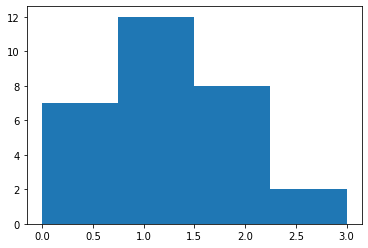

In [0]:
#Plotting histogram to check for normality.
import matplotlib.pyplot as plt
plt.hist(X4, bins=4)


(array([ 5., 14.,  5.,  5.]),
 array([0., 1., 2., 3., 4.]),
 <a list of 4 Patch objects>)

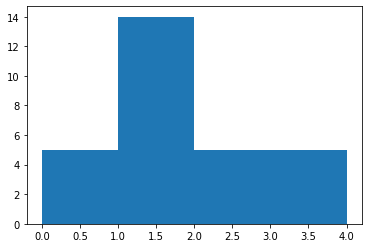

In [0]:
#Plotting histogram to check for normality
import matplotlib.pyplot as plt
plt.hist(Y4, bins=4)


Assumption of normality is also satified

## **Setting a level of significance.**



level choosen in this research is 0.05. Research allows a 5% error This means there is a 5% risk that we will be rejecting null when its true.

## **Computing the t-test statistic**

In [0]:
# calculate means
from statistics import mean
mean1, mean2 = mean(X4),mean(Y4)

In [0]:
# calculate sample standard deviations
import numpy as np
from statistics import stdev
std1, std2 = np.std(X4, ddof=1), np.std(Y4, ddof=1)

In [0]:
# calculate standard errors
import math
n1, n2 = len(X4), len(Y4)
se1, se2 = std1/math.sqrt(n1), std2/math.sqrt(n2)

In [0]:
# standard error on the difference between the samples
sed = math.sqrt(se1**2.0 + se2**2.0)

In [0]:
# calculate the t statistic
t_stat = (mean1 - mean2) / sed
t_stat

-0.897736767500627

## **Calculating the P-Value**

In [0]:
# compare samples
#We calculate the t-test and P-value using the built in SciPy function ttest_ind().

from scipy.stats import ttest_ind
stat, p = ttest_ind(X4, Y4)
print('t=%.3f, p=%.3f' % (stat, p))

t=-0.898, p=0.373


## **Hypothesis testing interpretation**


The null hypothesis is rejected when: 

P-Value < alpha.
In the research the P-Value is greater than the alpha level i.e. 0.373 > 0.05.
In this case we fail to reject the null hypothesis and conclude that:

The average blue car activity per station in paris is no greater in the morning hours(6-12) than in the afternoon hours(12-18)
